In [1]:
import numpy as np
import pandas as pd 

# data visualization
from matplotlib import pyplot as plt

# Algorithms

from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
pulsar = pd.read_csv("pulsar_stars.csv", index_col = None)
print(pulsar)

        Mean of the integrated profile  \
0                           140.562500   
1                           102.507812   
2                           103.015625   
3                           136.750000   
4                            88.726562   
5                            93.570312   
6                           119.484375   
7                           130.382812   
8                           107.250000   
9                           107.257812   
10                          142.078125   
11                          133.257812   
12                          134.960938   
13                          117.945312   
14                          138.179688   
15                          114.367188   
16                          109.640625   
17                          100.851562   
18                          136.093750   
19                           99.367188   
20                          100.890625   
21                          105.445312   
22                           95.86

In [4]:
X = pulsar.iloc[:, :-1]
y = pulsar.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=234)

In [17]:
def best_classifier(X_train, y_train, X_test, y_test):

  
   # Random Forest
    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X_train, y_train)
    train_acc_rf = str(round(random_forest.score(X_train, y_train)*100, 2))+"%"
    test_acc_rf = str(round(random_forest.score(X_test, y_test) * 100, 2))+"%"

    
    results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Train_Score': [train_acc_svc, train_acc_knn, train_acc_lr, train_acc_rf, train_acc_gauss, train_acc_perc, train_acc_sgd, train_acc_dt],
    'Test_Score': [test_acc_svc, test_acc_knn, test_acc_lr, test_acc_rf,test_acc_gauss, test_acc_perc, test_acc_sgd, test_acc_dt]})
    results=results.set_index('Model')
    results = results.sort_values(by='Test_Score', ascending=False)
    st = "The best classifier is {}, with best test accuracy of {}, and train accuracy of {}".format(results.index[0], results.iloc[0,0], results.iloc[0,1])
    
    return (st)


                                               Importance
Feature                                                  
 Excess kurtosis of the integrated profile       0.315045
 Mean of the integrated profile                  0.210950
 Skewness of the integrated profile              0.203503
 Mean of the DM-SNR curve                        0.069598
 Standard deviation of the DM-SNR curve          0.066480
 Standard deviation of the integrated profile    0.056981
 Excess kurtosis of the DM-SNR curve             0.042062
 Skewness of the DM-SNR curve                    0.035381


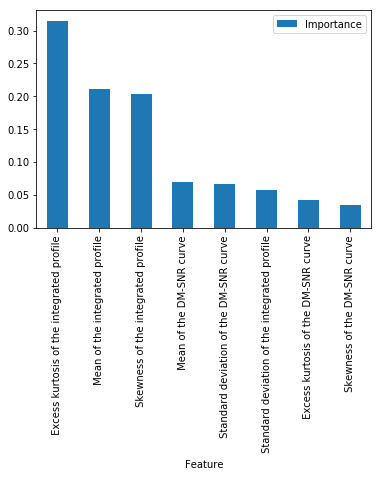

In [9]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
importances = pd.DataFrame({'Feature':pulsar.columns.drop('target_class'),                 'Importance':rf.feature_importances_}).set_index('Feature')
importances = importances.sort_values('Importance', ascending=False)
print(importances)
importances.plot.bar()
plt.show()

In [10]:
X_train = X_train.drop(list(importances.index[-2:]), axis=1)
X_test = X_test.drop(list(importances.index[-2:]), axis=1)
rf.fit(X_train, y_train)
print("Model's accuracy after dropping weak features: ",rf.score(X_test, y_test))


Model's accuracy after dropping weak features:  0.9811918063314712


In [12]:
rf_ft = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

rf_ft.fit(X_train, y_train)
print("Model's accuracy after tuning it: ",rf_ft.score(X_test, y_test))


Model's accuracy after tuning it:  0.9815642458100559
